First few rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   surviv

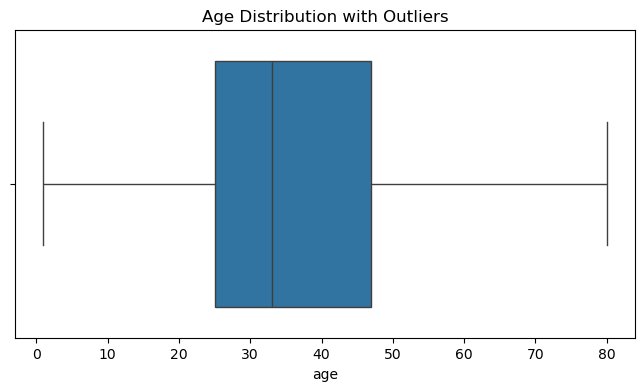

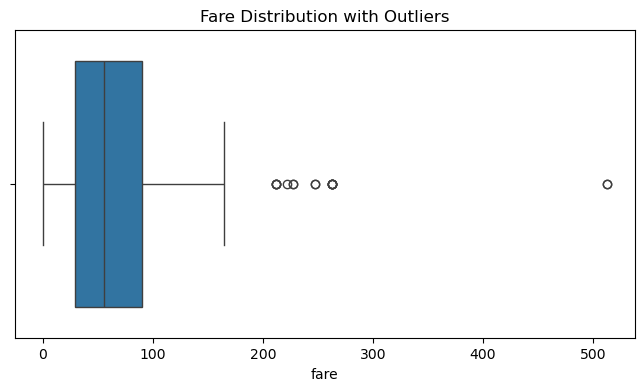

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 1 to 889
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     184 non-null    int64   
 1   pclass       184 non-null    int64   
 2   sex          184 non-null    object  
 3   age          184 non-null    float64 
 4   sibsp        184 non-null    int64   
 5   parch        184 non-null    int64   
 6   fare         184 non-null    float64 
 7   class        184 non-null    category
 8   who          184 non-null    object  
 9   adult_male   184 non-null    bool    
 10  deck         184 non-null    category
 11  embark_town  184 non-null    object  
 12  alive        184 non-null    object  
 13  alone        184 non-null    bool    
 14  sex_encoded  184 non-null    int8    
 15  embarked_Q   184 non-null    bool    
 16  embarked_S   184 non-null    bool    
dtypes: bool(4), category(2), float64(2), int64(4), int8(1), object(4)
memory usage

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#  Import the dataset
df = sns.load_dataset('titanic').copy()

#  Explore basic info
print("First few rows:\n", df.head())
print("\nInfo:\n", df.info())
print("\nNulls per column:\n", df.isnull().sum())

#  Handle missing values
# Example: Fill 'age' with mean, and 'embarked' with mode
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop remaining missing values if any
df.dropna(inplace=True)

#  Convert categorical features into numerical
# Encode 'sex' as 0/1
df['sex_encoded'] = df['sex'].astype('category').cat.codes

# One-hot encode 'embarked'
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

#  Visualize outliers using boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.title("Age Distribution with Outliers")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare'])
plt.title("Fare Distribution with Outliers")
plt.show()

# Remove outliers using IQR method
for col in ['age', 'fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#  Normalize / Standardize numerical features
scaler = StandardScaler()
numerical_features = ['age', 'fare']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Final datasets overview
print("\nCleaned and scaled dataset info:\n", df.info())
print("\nSample data:\n", df.head())

# Save the cleaned dataset
df.to_csv('titanic_cleaned_for_ml.csv', index=False)